In [2]:
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm import tqdm
import matplotlib.patches as patches
plt.style.use('ggplot')
%matplotlib inline 

In [3]:
# dataframe loading  
df = pd.read_csv("Online Retail.csv")

In [4]:
# adding a column with the total cost of each item in the order ("TotalCost")
df['TotalCost'] = df[df['ActionStatus'].isin(['O','C','L'])].apply(lambda row: row['Quantity']*row['UnitPrice'], axis=1)

# adding a column with order month ("Month")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# adding a column with order day ("Day")
df['Day'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

### Exploratory data analysis

#### Product research

In [5]:
# sales volume of each product 
number_of_unit = df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'Quantity':'sum'})['Quantity']
number_of_unit.describe() 
count_leader = number_of_unit.sort_values(ascending=False).index[0]

# revenue for each product 
number_of_money = df[(df['ActionStatus']=='O') & (df['TotalCost']!=0)].groupby(['StockCode']).agg({'TotalCost':'sum'})['TotalCost'] # тут было вот такое условие  & (df['TotalCost']!=0)
number_of_money.describe()
money_leader = number_of_money.sort_values(ascending=False).index[0]

# number of users who bought each product
number_of_purchases = df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'CustomerID':'unique'})['CustomerID'].apply(len)
number_of_purchases.describe()
purchase_leader = number_of_purchases.sort_values(ascending=False).index[0]

df[df['StockCode']==count_leader]['Description'].iloc[0]
df[df['StockCode']==money_leader]['Description'].iloc[0]
df[df['StockCode']==purchase_leader]['Description'].iloc[0]

'REGENCY CAKESTAND 3 TIER'

Text(0.5, 0, 'number of users who bought the product (log)')

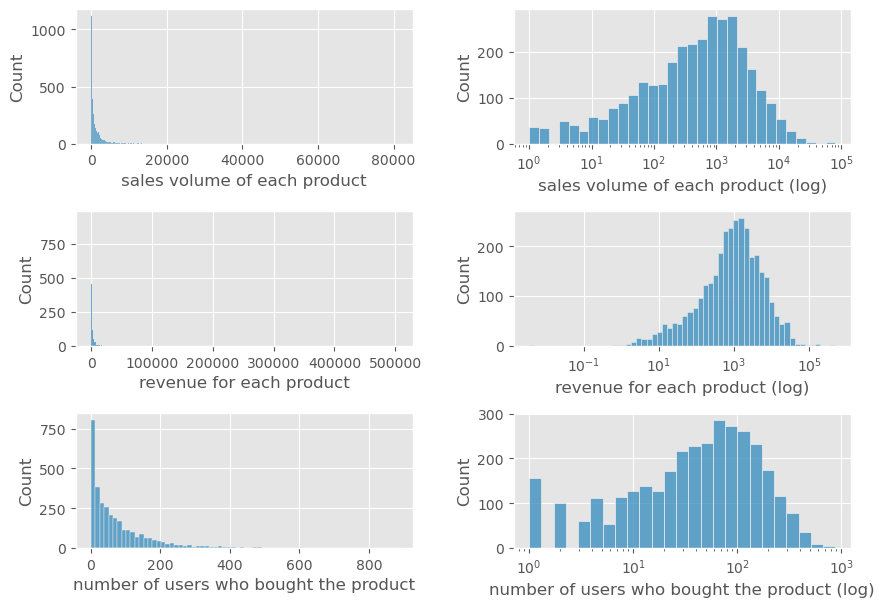

In [6]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(number_of_unit)
ax1.set_xlabel("sales volume of each product")
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(number_of_unit, log_scale=True)
ax2.set_xlabel("sales volume of each product (log)")

ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(number_of_money)
ax3.set_xlabel("revenue for each product")
ax4 = fig.add_subplot(gs[1, 1])
sns.histplot(number_of_money, log_scale=True)
ax4.set_xlabel("revenue for each product (log)")

ax5 = fig.add_subplot(gs[2, 0])
sns.histplot(number_of_purchases)
ax5.set_xlabel("number of users who bought the product")
ax6 = fig.add_subplot(gs[2, 1])
sns.histplot(number_of_purchases, log_scale=True)
ax6.set_xlabel("number of users who bought the product (log)")

In [7]:
# 10 products with the highest sales volume
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_unit.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_unit.sort_values(ascending=False).head(10).values, index = new_index)

PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO  BAG BAROQUE BLACK WHITE         79823
MEDIUM CERAMIC TOP STORAGE JAR         78033
SMALL POPCORN HOLDER                   56921
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
WHITE HANGING HEART T-LIGHT HOLDER     41956
ASSORTED COLOUR BIRD ORNAMENT          36461
PACK OF 72 RETROSPOT CAKE CASES        36419
ALLOCATE STOCK FOR DOTCOM ORDERS TA    31722
MINI PAINT SET VINTAGE                 26633
dtype: int64

In [8]:
# familiarization with the product that brought the greatest amount of revenue

number_of_money.sort_values(ascending=False).iloc[:2].sum() * 100 / number_of_money.sort_values().sum()
## 9% of revenue is generated by two types of delivery

# 10 Top Grossing Products 
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_money.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_money.sort_values(ascending=False).head(10).values, index = new_index)

DOTCOM POSTAGE                         503464.649913
POSTAGE                                495376.410702
REGENCY CAKESTAND 3 TIER               174636.287000
PAPER CRAFT , LITTLE BIRDIE            168469.600000
JUMBO  BAG BAROQUE BLACK WHITE         155541.174359
WHITE HANGING HEART T-LIGHT HOLDER     122263.056000
INCORRECTLY CREDITED C550456 SEE 47    118683.812045
MEDIUM CERAMIC TOP STORAGE JAR          81700.920000
MANUAL                                  81590.111923
ALLOCATE STOCK FOR DOTCOM ORDERS TA     69577.521429
dtype: float64

In [9]:
# 10 products purchased by the maximum number of users
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_purchases.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_purchases.sort_values(ascending=False).head(10).values, index = new_index)

REGENCY CAKESTAND 3 TIER               882
WHITE HANGING HEART T-LIGHT HOLDER     857
JUMBO  BAG BAROQUE BLACK WHITE         770
INCORRECTLY CREDITED C550456 SEE 47    761
ASSORTED COLOUR BIRD ORNAMENT          679
SET OF 3 CAKE TINS PANTRY DESIGN       641
PACK OF 72 RETROSPOT CAKE CASES        636
PAPER CHAIN KIT 50'S CHRISTMAS         614
NATURAL SLATE HEART CHALKBOARD         588
BAKING SET 9 PIECE RETROSPOT           582
dtype: int64

Text(0.5, 0, 'number of users who bought the product (90th percentile)')

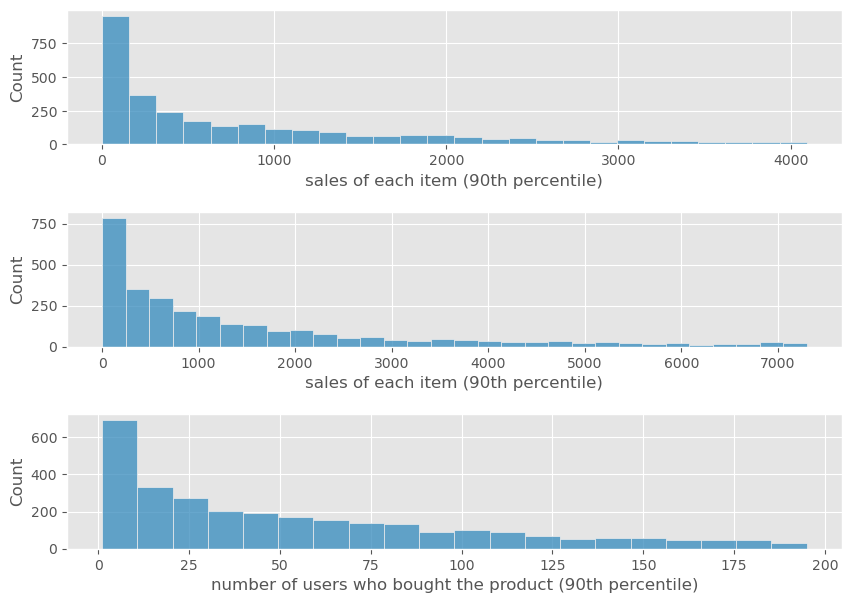

In [10]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 1, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(number_of_unit[number_of_unit<number_of_unit.quantile(0.9)])
ax1.set_xlabel("sales of each item (90th percentile)")

ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(number_of_money[number_of_money<number_of_money.quantile(0.9)])
ax2.set_xlabel("sales of each item (90th percentile)")

ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(number_of_purchases[number_of_purchases<number_of_purchases.quantile(0.9)])
ax3.set_xlabel("number of users who bought the product (90th percentile)")

<AxesSubplot:xlabel='Quantity', ylabel='TotalCost'>

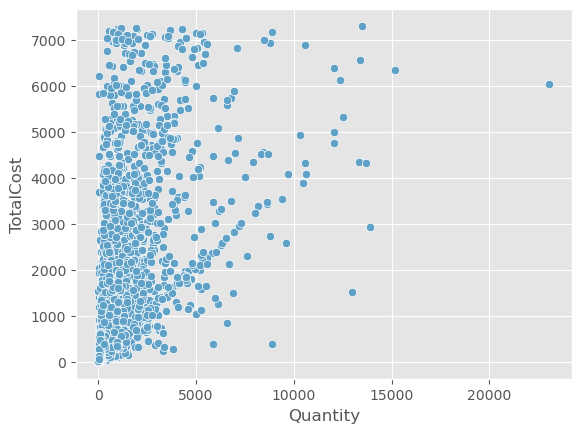

In [12]:
# dependency between product sales and revenue generated (90th percentile)
data = pd.merge(number_of_unit, number_of_money, left_index=True, right_index=True)
data = data.reset_index()[data.reset_index()['StockCode'].isin(number_of_money[number_of_money<number_of_money.quantile(0.9)].index)]
sns.scatterplot(data=data, x='Quantity', y='TotalCost', color=(96/255, 161/255, 199/255))

<AxesSubplot:xlabel='UnitPrice', ylabel='TotalCost'>

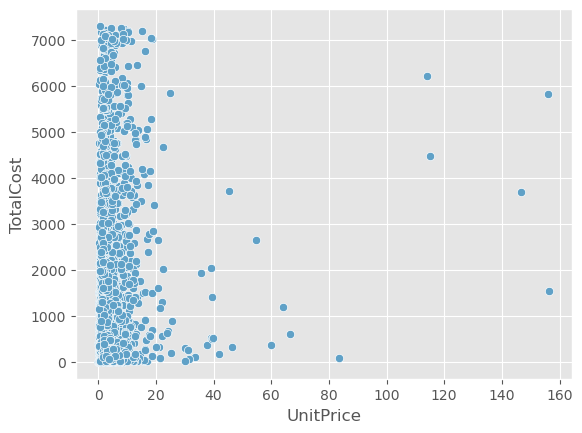

In [13]:
# dependency between unit cost and revenue generated (90th percentile)
data = pd.merge(df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'UnitPrice':'mean'}), number_of_money, left_index=True, right_index=True)
data = data.reset_index()[data.reset_index()['StockCode'].isin(number_of_money[number_of_money<number_of_money.quantile(0.9)].index)]
sns.scatterplot(data=data, x='UnitPrice', y='TotalCost', color=(96/255, 161/255, 199/255))

#### Results of product research

- product with the highest sales volume: "PAPER CRAFT , LITTLE BIRDIE";
- service with maximum revenue: "DOTCOM POSTAGE";
- two options for sending orders generate 9% of revenue;
- product with the maximum revenue: "REGENCY CAKESTAND 3 TIER";
- product purchased by the maximum number of users: "REGENCY CAKESTAND 3 TIER".


#### Order research

In [15]:
# revenue from each order
count_for_each_order = df[df['ActionStatus']=='O'].groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']
count_for_each_order.sum()
## total revenue is £11,518,776

count_for_each_order.shape
## number of orders is 20 723

(20723,)

Text(0.5, 0, 'revenue per order (90th percentile)')

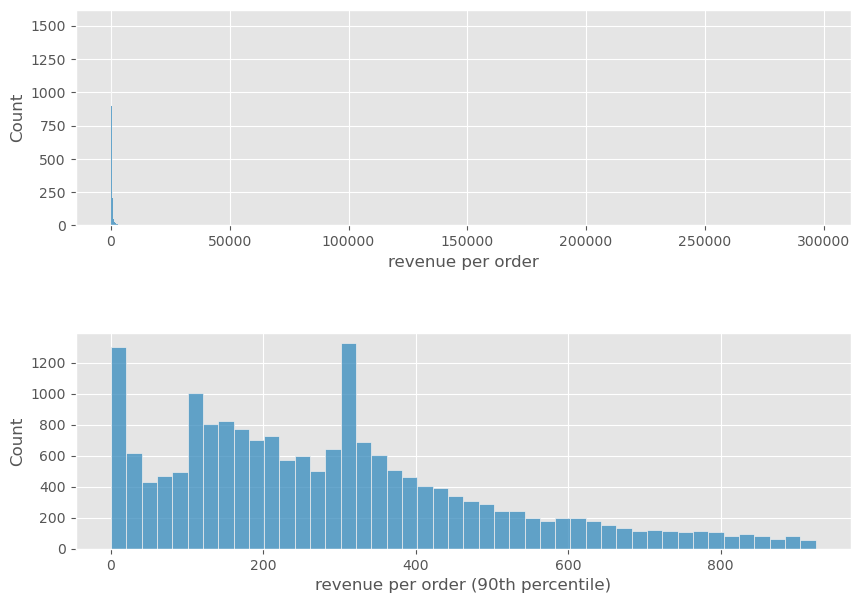

In [16]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
sns.histplot(count_for_each_order)
ax1.set_xlabel("revenue per order")
ax2 = fig.add_subplot(gs[1, :])
sns.histplot(count_for_each_order[count_for_each_order<count_for_each_order.quantile(0.9)])
ax2.set_xlabel("revenue per order (90th percentile)")

In [17]:
count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.9)].sum() * 100 / count_for_each_order.sum()
## top 10% of orders account for 53% of total revenue

count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.99)].sum() * 100 / count_for_each_order.sum()
## 1% of the largest orders account for 24% of total revenue

# Average Order Value
count_for_each_order.median() 
## average bill for the entire period is 300.5 £

orders_per_month = df[df['ActionStatus']=='O'].groupby(['Month']).agg({'InvoiceNo':'unique'})['InvoiceNo'].apply(len)
orders_per_month.median()
## average number of orders per month is 1540

# average bill by month 
aov_per_month_mean = df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'mean'})['TotalCost']
aov_per_month_median = df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'median'})['TotalCost']

# monthly revenue in thousands of pounds 
revenue_per_month = round(df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'sum'})['TotalCost'], 2)/1000

revenue_per_month.median() * 1000
## average monthly revenue is £822,008

df[df['Month']=='2011-12']['InvoiceDate'].sort_values()
## low number of orders in 2011-12 justified by the availability of data for only 9 days of the month

516382   2011-12-01 08:12:00
516383   2011-12-01 08:14:00
516384   2011-12-01 08:14:00
516385   2011-12-01 08:14:00
516386   2011-12-01 08:18:00
                 ...        
541894   2011-12-09 12:50:00
541893   2011-12-09 12:50:00
541892   2011-12-09 12:50:00
541898   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25525, dtype: datetime64[ns]

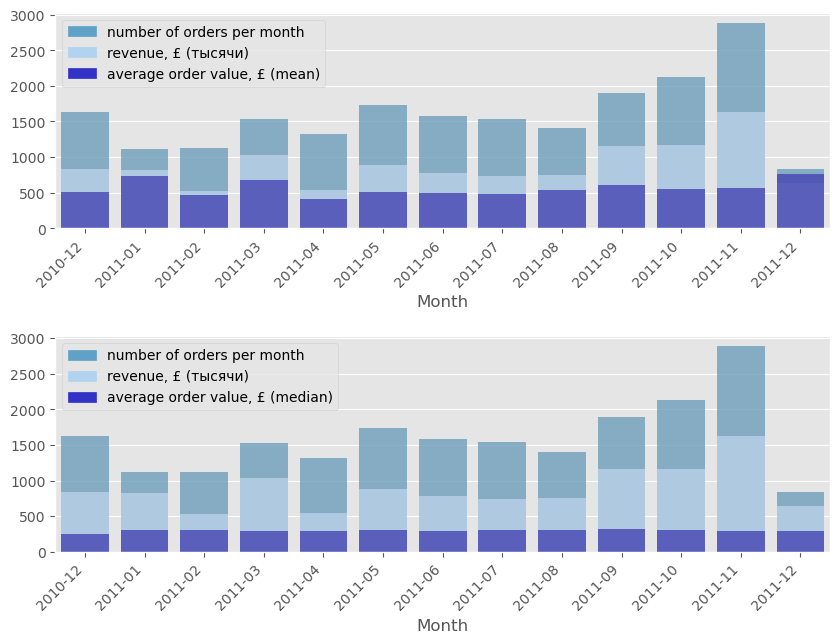

In [18]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='number of orders per month')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='average order value, £ (mean)')
patch_11 = patches.Patch(color=(50/255, 50/255, 199/255), label='average order value, £ (median)')
patch_2 = patches.Patch(color=(178/255, 211/255, 240/255), label='revenue, £ (тысячи)')

ax1 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, color=(178/255, 211/255, 240/255), alpha=0.8)
sns.barplot(x=aov_per_month_mean.index, y=aov_per_month_mean.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax1.set_xticklabels(orders_per_month.index, rotation=45, ha='right')
ax1.legend(handles=[patch, patch_2, patch_1])

ax2 = fig.add_subplot(gs[1, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, color=(178/255, 211/255, 240/255), alpha=0.8)
sns.barplot(x=aov_per_month_median.index, y=aov_per_month_median.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax2.set_xticklabels(orders_per_month.index, rotation=45, ha='right') 
ax2.legend(handles=[patch, patch_2, patch_11])

In [19]:
# study the top 1% of orders

big_orders = count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.99)]
df[df['InvoiceNo'].isin(big_orders.index)]['CustomerID'].value_counts(normalize=True)
## 80% of the biggest orders have an unknown user

df[df['InvoiceNo'].isin(big_orders.index)]['Month'].value_counts(normalize=True).iloc[:3].sum()
## 78% of the largest orders were made in the three months of 2010-12, 2011-11, 2011-12

df[df['InvoiceNo'].isin(big_orders.index)].groupby('InvoiceNo').agg({'Quantity':'sum'})['Quantity'].median()
## average number of items in the largest orders is 2,215 (sum of all items in the order)

df[df['StockCode'] == df[df['InvoiceNo'].isin(big_orders.index)].groupby(['StockCode']).agg({'CustomerID':'unique'})['CustomerID'].apply(len).sort_values(ascending=False).index[0]]['Description'].iloc[0]
## the most popular item in the largest orders purchased by the largest number of users "REGENCY CAKESTAND 3 TIER"

'REGENCY CAKESTAND 3 TIER'

In [22]:
# "lift"

# unique items
StockCode_unique = tuple(df[df['ActionStatus']=='O']['StockCode'].unique())

# list of goods in each order
comp_of_orders = tuple([tuple(i) for i in df[df['ActionStatus']=='O'].groupby(['InvoiceNo']).agg({'StockCode':'unique'})['StockCode'].values])

In [ ]:
# calculation of share of orders with each product
a = 0
dict_of_unit_values = dict()
for i in StockCode_unique: 
    for j in comp_of_orders: 
        if i in j:
            a+=1 
    dict_of_unit_values[i] = a / 20723 
    a = 0
    
# defining the existing product pairs
pbar = tqdm(tuple(filter(lambda a: True if len(a)!=1 else False, comp_of_orders)), ncols=80)
a = set()
for i in pbar:
    a.update(set(map(lambda a: tuple(sorted(a)), combinations(i, 2))))

In [ ]:
# lift calculation
pbar = tqdm(a, ncols=80)
b = tuple(filter(lambda a: True if len(a)!=1 else False, comp_of_orders))
z = 0
lift = dict()
for i in pbar:
    for j in b: 
        if i[0] in j:
            if i[1] in j:
                z+=1
    lift[i] = round((z / 20723) / (dict_of_unit_values[i[0]] * dict_of_unit_values[i[1]]), 3)
    z=0  

In [ ]:
for i in pd.Series(lift).sort_values(ascending=False).head(10).index:
    print(df[df['StockCode']==i[0]]['Description'].iloc[0], '-', df[df['StockCode']==i[1]]['Description'].iloc[0])

#### The result of the study of orders
- total revenue for the period: £11,51,8776;
- number of completed orders: 20,723;
- average bill for the whole period: 300.5 £;
- average number of orders per month: 1540;
- average monthly revenue: £822,000;
- month with the highest revenue: 2011-11;
- 1% of orders generates 24% of revenue;
- purchase items that are more closely related to each other (5 pairs):

  - OPULENT VELVET SET/3 CANDLES - KEEP OUT GIRLS DOOR HANGER
  - SET 10 CARDS TRIANGLE ICONS 17220 - SET 10 CARDS CHRISTMAS BAUBLE 16954
  - WHITE WITH METAL BAG CHARM - GREEN WITH METAL BAG CHARM
  - KEEP OUT GIRLS DOOR HANGER - WHITE DOVE HONEYCOMB PAPER GARLAND
  - COPPER AND BRASS BAG CHARM - GREEN WITH METAL BAG CHARM


#### Research on canceled orders

In [20]:
# total number of canceled orders
len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())

3836

In [22]:
# pivot table with date, composition, status, and user of each order
per_in_inv = df[df['CustomerID']!=0].groupby(['InvoiceNo', 'ActionStatus']).agg({'StockCode':'unique'}).reset_index()
per_in_inv['StockCode'] = per_in_inv['StockCode'].apply(lambda a: sorted(a)) 

per_in_inv = per_in_inv.merge(df.groupby(['InvoiceNo']).agg({'Day':'unique'}).reset_index(), on='InvoiceNo', how='left')
per_in_inv = per_in_inv.merge(df.groupby(['InvoiceNo']).agg({'CustomerID':'unique'}).reset_index(), on='InvoiceNo', how='left')
per_in_inv['Day'] = pd.to_datetime(per_in_inv['Day'].astype('str'), format = "['%Y-%m-%d']")
per_in_inv['CustomerID'] = per_in_inv['CustomerID'].astype('int')
per_in_inv['StockCode'] = per_in_inv['StockCode'].astype('str')

In [23]:
dict_C_O = dict()
for i in per_in_inv[(per_in_inv['ActionStatus']=='C')]['InvoiceNo'].values:
    data = per_in_inv[(per_in_inv['StockCode']== per_in_inv[per_in_inv['InvoiceNo']==i]['StockCode'].iloc[0]) &  \
                      (per_in_inv['Day']== per_in_inv[per_in_inv['InvoiceNo']==i]['Day'].iloc[0]) & \
                      (per_in_inv['CustomerID']== per_in_inv[per_in_inv['InvoiceNo']==i]['CustomerID'].iloc[0]) & \
                      (per_in_inv['ActionStatus']!= per_in_inv[per_in_inv['InvoiceNo']==i]['ActionStatus'].iloc[0])]
    if len(data)!=0: 
        dict_C_O[i] = True
        
len(dict_C_O) * 100 / len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())
## in 4% of cases, the user who canceled the order made an order identical to the one canceled on the same day
## assumption: perhaps this happened due to the non-intuitiveness of the interface

4.040667361835245

In [24]:
dict_C_O_1 = dict()
for i in per_in_inv[(per_in_inv['ActionStatus']=='C')]['InvoiceNo'].values:
    data = per_in_inv[(per_in_inv['Day']== per_in_inv[per_in_inv['InvoiceNo']==i]['Day'].iloc[0]) & \
                      (per_in_inv['CustomerID']== per_in_inv[per_in_inv['InvoiceNo']==i]['CustomerID'].iloc[0]) & \
                      (per_in_inv['ActionStatus']!= per_in_inv[per_in_inv['InvoiceNo']==i]['ActionStatus'].iloc[0])]
    if len(data)!=0: 
        dict_C_O_1[i] = True
        
len(dict_C_O_1) * 100 / len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())
## in 27% of cases, the user who canceled the order made another order on the same day that is not identical to the canceled one
## assumption: the canceled order may have been placed by mistake

27.398331595411886

In [25]:
real_C = df[(df['InvoiceNo'].isin(per_in_inv[(per_in_inv['ActionStatus']=='C') & (~per_in_inv['InvoiceNo'].isin(tuple((dict_C_O_1 | dict_C_O).keys())))]['InvoiceNo'].values)) | ((df['ActionStatus']=='C') & (df['CustomerID']==0))]

len(real_C['InvoiceNo'].unique())
## скорректированное, относительно наличия заказов, сделанных по ошибке, количество отменных заказов 2 785

len(df[df['ActionStatus'].isin(('O',))]['InvoiceNo'].unique()) + len(real_C['InvoiceNo'].unique())
# adjusted for the presence of orders made by mistake, the total number of orders is 23,508
 
len(real_C['InvoiceNo'].unique()) * 100 / (len(df[df['ActionStatus'].isin(('O',))]['InvoiceNo'].unique()) + len(real_C['InvoiceNo'].unique()))
## 11.8% of total orders were canceled (adjusted for any orders made in error)

df[df['ActionStatus'].isin(('O', 'C'))].groupby(['InvoiceNo']).agg({'ActionStatus':'unique'})['ActionStatus'].astype('str').value_counts(normalize=True)
## 15.6% of the total orders were canceled (not adjusted for the presence of orders made in error)

real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].median()
## the average bill in canceled orders is £16

real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'][real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']>real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].quantile(0.9)].sum() * 100 / real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## 10% of canceled orders generate 87% of the total value of canceled orders

real_C['TotalCost'].sum()
## total value of canceled orders is £425,922

month_C = real_C.groupby(['InvoiceNo']).agg({'Month':'unique'})['Month'].astype('str').apply(lambda a: a[2:-2]).value_counts().sort_index()
month_C.sort_values().mean()
## average number of canceled orders per month is 214

214.23076923076923

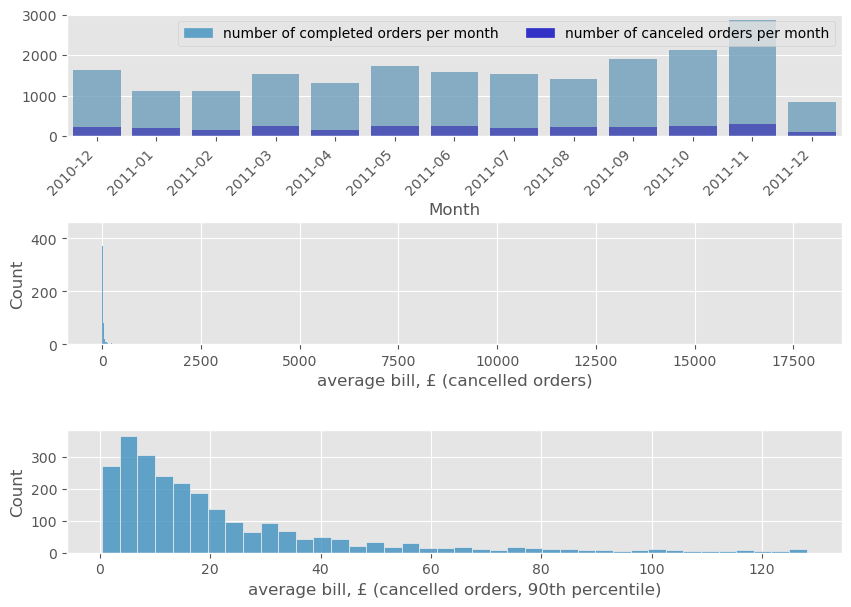

In [26]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.7, wspace=0.3) 

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='number of completed orders per month')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='number of canceled orders per month')

ax1 = fig.add_subplot(gs[1, :])
sns.histplot(real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'])
ax1.set_xlabel("average bill, £ (cancelled orders)")

ax2 = fig.add_subplot(gs[2, :])
sns.histplot(real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'][real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']<real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].quantile(0.9)])
ax2.set_xlabel("average bill, £ (cancelled orders, 90th percentile)")

ax3 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=month_C.index, y=month_C.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax3.set_xticklabels(orders_per_month.index, rotation=45, ha='right') 
ax3.legend(handles=[patch, patch_1], ncol=2)

#### The result of the study of canceled orders
- in 4% of cases, the user who canceled the order made a similar order on the same day. From this we can conclude that the order was placed by mistake;
- in 27% of cases, the user who canceled the order placed another order on the same day. From this we can conclude that the order was placed by mistake;
- adjusted, relative to the presence of orders made by mistake, the percentage of canceled orders to the total number of orders: 11.8%;
- average number of canceled orders per month: 214;
- average bill in canceled orders: £16;
- total cost of canceled orders: £425,922;
- 10% of canceled orders generate 87% of the total cost of canceled orders.

#### User research

In [27]:
len(df[df['ActionStatus']=='O']['CustomerID'].unique()) - 1
cust_per_month = df[df['ActionStatus']=='O'].groupby(['Month']).agg({'CustomerID':'nunique'})['CustomerID'].sort_index()
## number of users is 4339. unknown users are not counted

df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'InvoiceNo':'nunique'})['InvoiceNo'].loc[0] * 100 / df[(df['ActionStatus']=='O')]['InvoiceNo'].nunique()
## 10.5% of orders are made by unknown users

num_of_or = df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'InvoiceNo':'nunique'})['InvoiceNo'].iloc[1:]
num_of_or.median()
## average number of orders placed by users is 2

count_of_or = df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].iloc[1:]
count_of_or[count_of_or>count_of_or.quantile(0.9)].sum() * 100 / df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## 10% of known users generate 47% of revenue

df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].iloc[0] * 100 / df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## unknown users generate 22.5% of revenue

count_of_or.median()
## Average Revenue Per User (ARPU) is £674.68

674.68

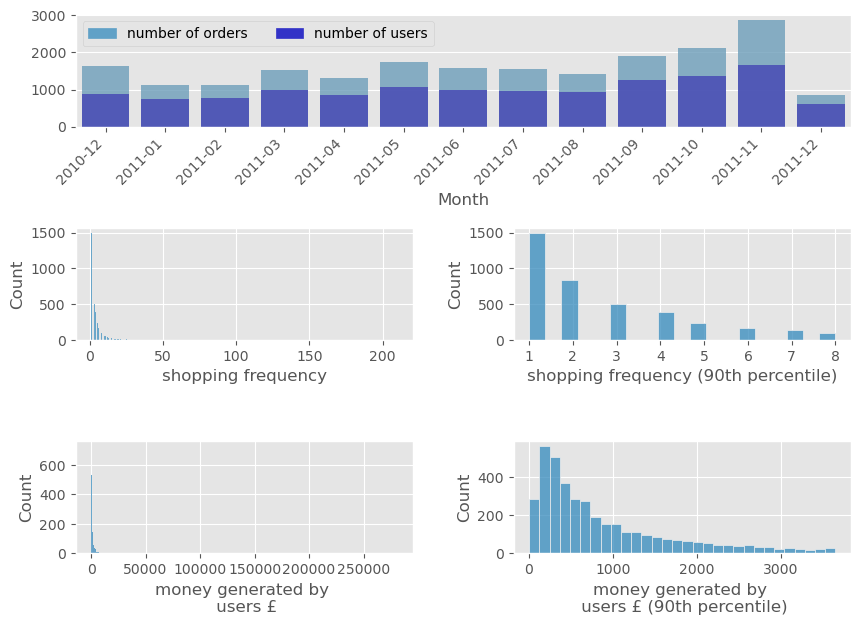

In [29]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.9, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='number of orders')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='number of users')

ax1 = fig.add_subplot(gs[1, 0])
sns.histplot(num_of_or)
ax1.set_xlabel("shopping frequency")

ax2 = fig.add_subplot(gs[1, 1])
sns.histplot(num_of_or[num_of_or<num_of_or.quantile(0.9)])
ax2.set_xlabel("shopping frequency (90th percentile)")

ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(count_of_or)
ax3.set_xlabel("money generated by \n users £")

ax4 = fig.add_subplot(gs[2, 1])
sns.histplot(count_of_or[count_of_or<count_of_or.quantile(0.9)])
ax4.set_xlabel("money generated by \n users £ (90th percentile)")

ax5 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=cust_per_month.index, y=cust_per_month.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax5.set_xticklabels(cust_per_month.index, rotation=45, ha='right') 
ax5.legend(handles=[patch, patch_1], loc='upper left', ncol=2)

In [30]:
# study of users who canceled orders 

dict_real_C = dict()
for i in real_C['CustomerID'].unique():
    data = df[(df['ActionStatus'].isin(('O', 'C'))) & (df['CustomerID']==i)].loc[::, ['InvoiceNo', 'Country', 'ActionStatus', 'Day']]
    data = data[~data.duplicated()].merge(df[(df['ActionStatus'].isin(('O', 'C'))) & (df['CustomerID']==i)].groupby(['InvoiceNo']).agg({'TotalCost':'sum'}).reset_index(), on='InvoiceNo', how='left')
    if (len(data['ActionStatus'].unique()) == 1) and (len(data['Day'].unique()) == 1):
        dict_real_C[i]='used once. cancel'
        ## single attempt of a user to interact with the service
        
    elif list(data.groupby(['Day']).agg({'ActionStatus':'unique'})['ActionStatus'].iloc[-1]) != ['C']:
        dict_real_C[i]= 'used after cancel'
        ## after canceling the order, the user used the service and made at least 1 order
        
    elif (len(data['ActionStatus'].unique()) != 1) & (list(data.groupby(['Day']).agg({'ActionStatus':'unique'})['ActionStatus'].iloc[-1]) == ['C']):
        dict_real_C[i]= 'used before. not used after cancel'
        ## the user made orders before the cancellation and did not make after the cancellation of the order
        
    elif (len(data['ActionStatus'].unique()) == 1) and (len(data['Day'].unique()) != 1):
        dict_real_C[i]= 'used several times. cancel'
        ## the user canceled orders for several days in a row. never ordered before

len(df[df['ActionStatus']=='O']['CustomerID'].unique()) - 1 + pd.Series(dict_real_C).value_counts().iloc[2] + pd.Series(dict_real_C).value_counts().iloc[3]
## number of unique users is 4,372. users who made orders and canceled (including users who only made order cancellations)
        
pd.Series(dict_real_C).value_counts(normalize=True)

used after cancel                     0.634202
used before. not used after cancel    0.340491
used once. cancel                     0.023773
used several times. cancel            0.001534
dtype: float64

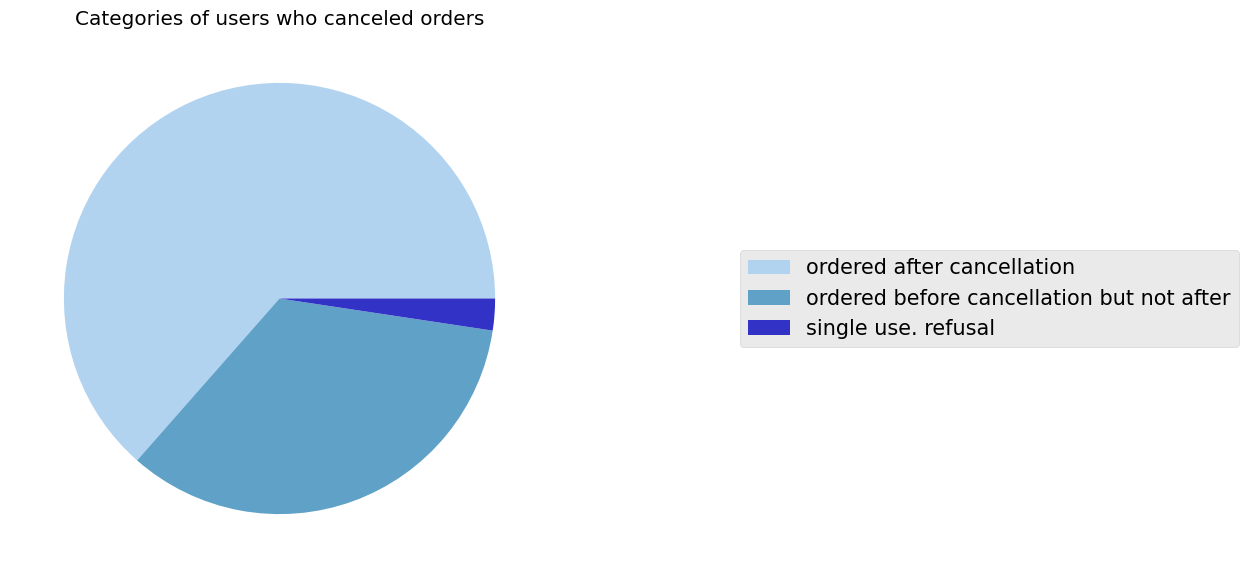

In [31]:
# graphs 
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0:, :])
plt.title('Categories of users who canceled orders', pad=0.5)
colors = [(178/255, 211/255, 240/255), (96/255, 161/255, 199/255), (50/255, 50/255, 199/255)]
plt.pie(pd.Series(dict_real_C).value_counts().iloc[:-1], radius=1.0, colors=colors, center = (0, 5))
plt.legend(loc='center right', bbox_to_anchor=(2.3, 0.5), labels = ['ordered after cancellation', 'ordered before cancellation but not after', 'single use. refusal'], fontsize = 15)

In [ ]:
# user rankings based on their average monthly generated percentage of revenue

uniq_cust = np.append(df[(df['ActionStatus']=='O') & (df['CustomerID']!=0)]['CustomerID'].unique(), pd.Series(dict_real_C)[pd.Series(dict_real_C).isin(('used once. cancel', 'used several times. cancel'))].index, axis=0) 
pbar = tqdm(uniq_cust, ncols=80)
dict_cust = dict()
b = df[(df['ActionStatus']=='O')].groupby(['Month']).agg({'TotalCost':'sum'})['TotalCost']
z = df[(df['ActionStatus']=='O')].groupby(['Month', 'CustomerID']).agg({'TotalCost':'sum'})['TotalCost']
for i in pbar:
    a = dict()
    for j in list(df['Month'].unique()):
        try:
            a[j] = z.loc[j, i] * 100 / b.loc[j]
        except:
            a[j] = 0
            continue        
    dict_cust[i] = pd.Series(a).mean()

pd.Series(dict_cust).sort_values(ascending=False) 

#### Results of user research
- number of users: 4372;
- 10.5% of orders are made by unknown users;
- unknown users generate 22.5% of revenue;
- 10% of known users generate 47% of revenue;
- average number of orders placed by users: 2;
- average revenue per user (ARPU): £674.68;
- 63% of users who canceled an order continued to use the service;
- 34% of users, after canceling the order, did not use the service anymore;
- for 2% of users, a canceled order was the only;
- based on the available data, a user rating was created.


#### Write-off research

In [33]:
df[df['ActionStatus']=='L']['TotalCost'].sum()
## total write-offs are £452,004

df[df['ActionStatus']=='L']['StockCode'].value_counts()
df[(df['ActionStatus']=='L') & (df['StockCode']==72802)]['Description'].iloc[0]
## item with the most write-offs

df[df['ActionStatus']=='L'].groupby(['StockCode']).agg({'Quantity':'sum'})['Quantity'].sort_values(ascending=False)
df[(df['ActionStatus']=='L') & (df['StockCode']==23005)]['Description'].iloc[0]
## goods written off in the largest volume

month_L = df[df['ActionStatus']=='L'].groupby(['Month']).agg({'UnitPrice':'sum'})['UnitPrice']
month_L.median()
## average monthly write-off is £354

354.9330357142857

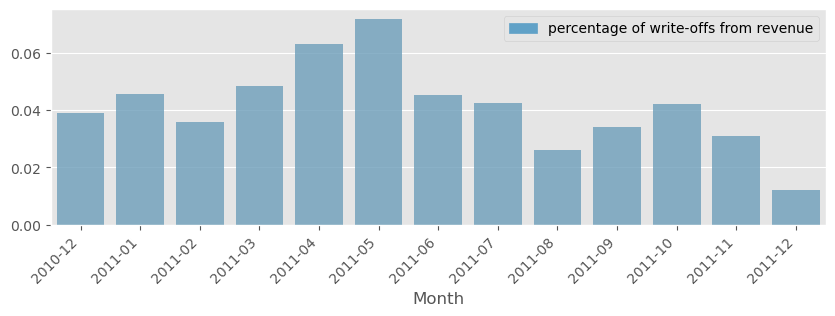

In [34]:
# graphs
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='percentage of write-offs from revenue')

data = pd.concat(((revenue_per_month * 1000), month_L), axis=1).apply(lambda row: row['UnitPrice'] * 100 / row['TotalCost'], axis=1)

ax1 = fig.add_subplot(gs[1, :])
sns.barplot(x=data.index, y=data.values, color=(96/255, 161/255, 199/255), alpha=0.8)
ax1.set_xticklabels(cust_per_month.index, rotation=45, ha='right') 
ax1.legend(handles=[patch], loc='upper right')

#### Write-off study results
- total write-offs: £452,004;
- item that was written off more often than others: "ROSE SCENT CANDLE IN JEWELLED BOX";
- goods written off in the largest volume: "TRAVEL CARD WALLET I LOVE LONDON";
- average monthly write-off: £354.
